# Introduction

In this notebook, we explore the heat equation. This model was created by the french mathematician Joseph Fourier to model the heat flow on a conducting material. Heat conduction is an example of of a *diffusion process*, which is one of the most important types of models in applied mathematics. They are used to model, for example, how diseases spread, how pollutants spread in the atmosphere and (somewhat surprising) how the stock market evolves.

# Discretization of the one-dimensional heat equation

We start with a simple one-dimensional model. Suppose we have a rod of heat-conducting material. We assume that  the rod is well-insulated, except at it's endpoints, where heat can be exchanged with the environment. Let $L$ be the length of the rod. We use the variable $x$ to identify the position of a point on the rod, and let $u(x,t)$ denote the temperature of the rod at position $x$ and time $t$. The evolution of $u(x,t)$ is then derived according to the following equation:
$$
u_t=\alpha u_{xx}+f(x)
$$
In this equation, $\alpha>0$ is a called the *diffusion coefficient*, and is related to how fast heat flows. The function $f(x)$ represents an *internal heat source* at position $x$. The equation above is called the *time dependent heat equation*, and the solution $u(x,t)$ represents the evolution of the temperature distribution as $t$ changes. In many situations, $u(x,t)$ converges, as $t\to\infty$, to a stable temperature distribution. In this limit, the distribution does not change with time, so that $u_t=0$, and the equation becomes:
$$
\alpha u_{xx}+f(x)=0
$$
Notice that now $u(x)$ is a function of one variable, denoting the stationary heat distribution.

Besides the equation above, which models heat flow in the rod, we need to set *boundary conditions* that specify how heat is exchange at the ends of the rod. In our first example, we will assume that the ends of the rod are kept at constant temperature, represented by the equations:
$$
u(0)=a,\quad u(L)=b
$$

We will solve this equation by the *method of finite differecences*. We discretize both space and time using the same formulas for numerical differentiation from Lesson 13. 

To discretize space, we choose am integer $N$ and subdivide the interval $[0,L]$ in $N$ subintervals, by defining the *grid points*:
\[
x_i=ih,\quad(0\le i\le N),
\]
where $h=1/N$. We want to approximate the solution $u(x)$ at the grid points $x_i$. To be precise, we want to compute values $u_0,\ldots u_N$ such that $u_i=u(x_i)$

To construct the approximation, we use a central difference approximation for the second derivative:
$$
u_{xx}(x_i)\approx \frac{u(x_i+h)-2u(x_i)+u(x_i-h)}{h^2}\approx \frac{u_{i+1}-2u_i+u_{i-1}}{h^2}
$$
We use this formula to define the discretized version of the heat equation:
$$
\alpha \frac{u_{i+1}-2u_i+u_{i-1}}{h^2}+f(x_i)=0,\quad (1\le i\le N-1),
$$
which we rewrite as:
$$
u_{i+1}-2 u_i+u_{i-1}=-\frac{h^2}{\alpha}f(x_i)=0,\quad (1\le i\le N-1)
$$
This formula is only valid at the *interior* grid points. At the boundary points we have:
$$
u_0=a,\quad u_N=b.
$$

In order to compute a numerical approximation, we reformulate the problem in terms of matrices. We define a vector:
$$
\mathbf{u}=\left[\begin{matrix}u_0 \\ u_2 \\ \vdots \\ u_N\end{matrix}\right]
$$
We also define a matrix $A=(a_{ij})_{0\le i,j\le N}$ by:
$$
\begin{cases}
a_{ii}=-2 & \text{if $1\le i\le N-1$}\\
a_{i,i+1}=a_{i,i-1}=1 & \text{if $1\le i\le N-1$}\\
a_{00}=a_{NN}=1\\
a_{ij}=0 & \text{for all other values of $i$, $j$}
\end{cases}
$$
Finally, we define a vector $\mathbf{r}=(r_i)_{0\le i\le N}$ by:
$$
r_i=
\begin{cases}
-\frac{h^2}{\alpha}f(x_i) & \text{if $1\le i\le N-1$}\\
a & \text{if $i=0$}\\
b & \text{if $i=N$}
\end{cases}
$$
With this notation, we can write the discretized heat equation as the linear system:
$$
A\mathbf{u}=\mathbf{r}
$$


# Numerical Implementation

As a concrete example, we will solve the following version of the stady-state heat equation, for a rod of length $L=1$:
$$
0.5 u_{xx}+\sin(\pi x)=0
$$
with boundary conditions:
$$
u(0)=1,\quad u(\pi)=-2
$$

We now want to, in Python, do the following:

- Define the problem parameters $L$, $a$, $b$, $\alpha$ and the discretization data, consisting of $N$, $h$, and the vector of grid points.
- Define the matrix $A$ and the vector $\mathbf{r}$.
- Find the solution $\mathbf{u}$ of the linear system $A\mathbf{u}=\mathbf{r}$

We start by defining the problem parameters and the discretization data. We first choose a small number of grid points to make error-checking easier:

In [1]:
import numpy as np
L = 1
alpha = 0.5
a, b = 0.2, 0.5
N = 5
h = L / N
xgrid = np.linspace(0, L, N)
print(L, a, b, alpha, N, h, xgrid)

1 0.2 0.5 0.5 5 0.2 [0.   0.25 0.5  0.75 1.  ]


Notice that to define the vector of grid points, we use the function `linspace():`
    
    xgrid = np.linspace(0, L, N)
    
This function returns an array of equally spaced points. Notice that, contrary to the usual convention, the rightmost point *is included* in  the range.

It is now easy to define the right-hand side of the numerical approximation:

In [2]:
r = - h ** 2 / alpha * np.sin(np.pi * xgrid)
r[0], r[N-1] = a, b
print(r)

[ 0.2        -0.05656854 -0.08       -0.05656854  0.5       ]


Let's now consider the matrix $A$. This is a *tridiagonal matrix* with the following structure:

$$
\left[\begin{matrix}
1 &  0 &  0 &  0 & \cdots & 0 & 0 & 0\\
1 & -2 &  1 &  0 & \cdots & 0 & 0 & 0\\
0 &  1 & -2 &  1 & \cdots & 0 & 0 & 0\\
0 &  0 &  1 & -2 & \cdots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 &  0 &  0 & 0 & \cdots & 1 & -2 & 1\\
0 &  0 &  0 & 0 & \cdots & 0 &  0 & 1\\
\end{matrix}\right]
$$

To construct this matrix, we use the following simple approach: first create a matrix of zeros with the appropriate size and then set the entries using a `for` loop.

In [3]:
A = np.zeros((N, N), np.float64)
for i in range(N):
    A[i,i] = -2.0
for i in range(1, N-1):
    A[i, i - 1] = 1.0
for i in range(1, N-1):
    A[i, i + 1] = 1.0
A[0, 0] = 1
A[N-1, N-1] = 1
print(A)

[[ 1.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  1.]]


We are now ready to solve the system. In computational mathematics, the method chosen to solve a linear system is of crucial importance. Somewhat non-intuitively, matrix inversion is, in general, *not* the recommended approach, since there are more efficient methods. Here, we use the function `solve()` from the module `np.linalg`, which implements a LU decomposition:

In [4]:
u = np.linalg.solve(A, r)
print(u)

[0.2        0.37156854 0.48656854 0.52156854 0.5       ]


Let's now solve the problem with a larger grid, and plot the solution:

In [5]:
L = 1
alpha = 0.5
a, b = 0.2, 0.5
N = 100
h = L / N
xgrid = np.linspace(0, L, N)
r = - h ** 2 / alpha * 5 * np.sin(np.pi * xgrid)
r[0], r[N-1] = a, b
A = np.zeros((N, N), np.float64)
for i in range(N):
    A[i,i] = -2.0
for i in range(1, N-1):
    A[i, i - 1] = 1.0
for i in range(1, N-1):
    A[i, i + 1] = 1.0
A[0, 0] = 1
A[N-1, N-1] = 1
u = np.linalg.solve(A, r)

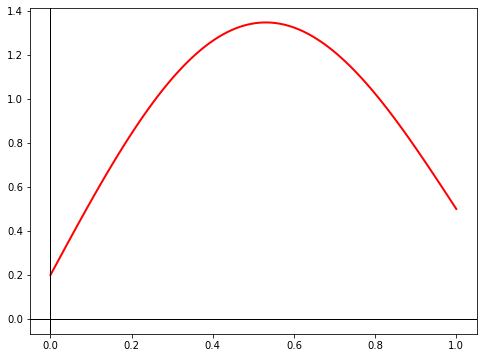

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(xgrid, u, color='red', lw=2)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
None

In [7]:
print(u)

[0.2        0.23454034 0.26904895 0.30349413 0.33784426 0.3720678
 0.40613333 0.44000962 0.47366559 0.50707042 0.54019351 0.57300457
 0.60547361 0.63757099 0.66926743 0.70053409 0.73134251 0.76166474
 0.79147329 0.8207412  0.84944205 0.87754999 0.90503978 0.93188677
 0.958067   0.98355715 1.0083346  1.03237746 1.05566458 1.07817554
 1.09989075 1.12079137 1.14085943 1.16007777 1.17843007 1.19590093
 1.21247579 1.22814102 1.24288389 1.25669262 1.26955634 1.28146516
 1.29241014 1.30238331 1.31137768 1.31938724 1.32640698 1.33243288
 1.33746192 1.3414921  1.3445224  1.34655283 1.34758439 1.3476191
 1.34665997 1.34471101 1.34177725 1.33786469 1.33298032 1.3271321
 1.32032898 1.31258086 1.30389859 1.29429397 1.28377971 1.27236947
 1.26007777 1.24692004 1.23291259 1.21807256 1.20241797 1.18596761
 1.1687411  1.15075884 1.132042   1.11261245 1.09249283 1.07170644
 1.05027727 1.02822993 1.00558969 0.98238238 0.95863444 0.93437281
 0.90962499 0.88441895 0.85878311 0.83274634 0.8063379  0.7795874